## How to Build a Recommendation Engine that isn’t MovieLens

Abstract:

> Recommendation engines are pretty simple. Or at least, they are made to seem simple by an uncountable number of online tutorials. The only problem: **it’s hard to find a tutorial that doesn’t use** the ready-made and pre-baked **MovieLens** dataset. Fine. But, perhaps you’ve followed one of these tutorials and have struggled to imagine how to, or otherwise implement your own recommendation engine on your own data. In this workshop, I’ll show you how to use industry-leading open source tools to **build your own engine** and how to **structure your own data** so that it might be “recommendation-compatible”.

![](images/about_max.png)

### MovieLens

![](images/movielens.png)

### Quickstart

![](images/light_fm.png)

[Source](https://github.com/lyst/lightfm)

```sh
pip install lightfm
```

In [1]:
#

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k

data = fetch_movielens(min_rating=5.0)
model = LightFM(loss='warp')
model.fit(data['train'], epochs=30, num_threads=2)

precision_at_k(model, data['test'], k=5).mean()

ConnectionError: HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: /maciejkula/lightfm_datasets/releases/download/v0.1.0/movielens.zip (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001C6D36A5C18>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [4]:
data

NameError: name 'data' is not defined

In [5]:
data['train']

NameError: name 'data' is not defined

### Data

![](images/halloween.png)

![](images/candy.jpg)

![](images/influenster.png)

This *was* working on 2019-10-19:

```python
import time
import json
import random
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from gazpacho import Soup
from tqdm import tqdm
import pandas as pd

options = Options()
options.headless = True
browser = Firefox(options=options)

def make_soup(url):
    browser.get(url)
    html = browser.page_source
    soup = Soup(html)
    return soup

def build_review_url(product, page):
    base = 'https://www.influenster.com'
    url = f'{base}/{product}?review_sort=most+recent&review_page={page}'
    return url

def parse_review(product, review):
    stars = int(review.find('div', {'class': 'avg-stars'}).attrs['data-stars'])
    user = review.find('div', {'class': 'content-item-author-info'}).find('a').attrs['href'][1:]
    return {'product': product, 'user': user, 'stars': stars}

def scrape_product_page(product, page):
    url = build_review_url(product, page)
    soup = make_soup(url)
    page_reviews = soup.find('div', {'class': 'content-item review-item'})
    return [parse_review(product, r) for r in page_reviews]

def scrape_product(product):
    url = build_review_url(product, 1)
    soup = make_soup(url)
    pages = int(
        soup.find('div', {'class': 'product-highlights-results'})
        .text
        .replace(',', '')
        .split(' ')[0]
    ) // 10 + 1
    pages = min(pages, 100)
    pages = list(range(1, pages+1))
    random.shuffle(pages)
    reviews = []
    for page in pages:
        print(f'scraping page: {page}')
        page_reviews = scrape_product_page(product, page)
        reviews.extend(page_reviews)
        time.sleep(random.randint(1, 10) / 10)
    return reviews

def scrape_index(category='sweets-candy-gum'):
    product_index = []
    for page in tqdm(range(1, 10+1)):
        url = f'https://www.influenster.com/reviews/{category}?page={page}'
        soup = make_soup(url)
        products = soup.find('a', {'class': 'category-product'}, strict=True)
        products = [p.attrs['href'] for p in products]
        candy.extend(products)
        time.sleep(random.randint(1, 10) / 10)
    return product_index

if __name__ == '__main__':

    product_index = scrape_index(category='sweets-candy-gum')

    product_reviews = []
    for product in tqdm(product_index):
        print(f'scraping: {product}')
        try:
            reviews = scrape_product(product)
            product_reviews.extend(reviews)
        except:
            pass
        time.sleep(random.randint(1, 10) / 10)

    df = pd.DataFrame(product_reviews)
    df.to_csv('data/candy.csv', index=False)
```

![](images/cat_and_mouse.jpg)

### Scrape 

![](images/influenster_index.png)

[Source](https://www.influenster.com/reviews/sweets-candy-gum)

In [6]:
with open('influenster/index.html', 'r') as f:
    html = f.read()

In [7]:
print(html[:500])

<!DOCTYPE html>
<html class="site-desktop svg " lang="en">
<head>
<meta http-equiv="content-type" content="text/html; charset=UTF-8">
<title>Sweets, Candy &amp; Gum Product Reviews, Questions and Answers | Influenster</title>
<meta name="title" content="Sweets, Candy &amp; Gum Product Reviews, Questions and Answers | Influenster">
<meta name="description" content="Got a sweet tooth? So do our users. Discover the best candy, gum, or chocolate for you from over thousands of reviews from our users.


![](images/gazpacho.png)

### gazpacho

```
pip install gazpacho
```

In [8]:
#!pip install gazpacho

In [9]:
from gazpacho import Soup

In [10]:
soup = Soup(html)

In [11]:
products = soup.find('a', {'class': 'category-product'})

In [12]:
products[0]

<a class="category-product" href="https://www.influenster.com/reviews/reeses-peanut-butter-cups-miniatures-76"><div class="category-product-image-container"><div class="category-product-image" style="background-image: url("index_files/51107862.jpg");"><img itemprop="image" data-img="div" src="index_files/51107862.jpg" alt="Reese's Peanut Butter Cups Miniatures" width="0" height="0"></div></div><div class="category-product-detail"><div class="category-product-title" data-truncate-lines="3" style="overflow-wrap: break-word;">Reese's Peanut Butter Cups Miniatures</div><div class="category-product-brand">
By Reese's
</div><div class="category-product-stars"><div class="avg-stars small " data-stars="4.82880054868237"><div class="star"><i class="star-icon"></i><div class="progress" data-star="1" data-progress="100"></div></div><div class="star"><i class="star-icon"></i><div class="progress" data-star="2" data-progress="100"></div></div><div class="star"><i class="star-icon"></i><div class="p

In [13]:
products = [p.attrs['href'] for p in products]

In [14]:
products[:5]

['https://www.influenster.com/reviews/reeses-peanut-butter-cups-miniatures-76',
 'https://www.influenster.com/reviews/ferrero-rocher-chocolate',
 'https://www.influenster.com/reviews/kit-kat-crisp-wafers-in-milk-chocolate',
 'https://www.influenster.com/reviews/lindt-lindor-milk-chocolate-truffles',
 'https://www.influenster.com/reviews/hersheys-cookies-n-creme-candy-bar']

![](images/influenster_skittles.png)

In [15]:
#look at a specific page.. We are using the saved html for now
with open('influenster/skittles.html', 'r') as f:
    html = f.read()

In [16]:
soup = Soup(html)

In [17]:
reviews = (soup
    .find('div', {'class': 'layoutComponents__Block-l2otzz-0 efHRYv'}, strict=True)
    .find('div', {'class': 'item wrappers__Wrapper-sc-1mex847-0 jEYnle'})
)

In [18]:
str(reviews[0])[:500]

'<div class="item wrappers__Wrapper-sc-1mex847-0 jEYnle">\n                                            <div class="author-card authorCard__AuthorCardWrapperDesktop-sc-26la3e-1 hAEwt"><a aria-label="anahce0f" href="/anahce0f">\n                                                    <div class="mediaComponents__ImageContainer-sc-1gsoaz-0 bEUCqQ" style="border-radius:50%" size="70"></div>\n                                                </a>\n                                                <div>\n          '

### Activity

Take 5 minutes to write a `parse_review` function

In [19]:
# hint 
review = reviews[0]
review.find('div', {'class': 'productComponents__SingleStar-sc-1ffpes9-3 kzXpnS'})

[<div class="productComponents__SingleStar-sc-1ffpes9-3 kzXpnS" size="20"></div>,
 <div class="productComponents__SingleStar-sc-1ffpes9-3 kzXpnS" size="20"></div>,
 <div class="productComponents__SingleStar-sc-1ffpes9-3 kzXpnS" size="20"></div>,
 <div class="productComponents__SingleStar-sc-1ffpes9-3 kzXpnS" size="20"></div>,
 <div class="productComponents__SingleStar-sc-1ffpes9-3 kzXpnS" size="20"></div>]

In [20]:
# %load solutions/parse_review.py
def parse_review(review):
    stars = len(review.find('div', {'class': 'productComponents__SingleStar-sc-1ffpes9-3 kzXpnS'}))
    user = (review.find('div',
        {'class': 'layoutComponents__Row-l2otzz-2 MSbai layoutComponents__Block-l2otzz-0 ixyxcj'}
        ).find('a').attrs['href'])[1:]
    return {'user': user, 'stars': stars}


In [21]:
parse_review(review)

{'user': 'anahce0f', 'stars': 5}

In [22]:
candy = [parse_review(r) for r in reviews]

candy

[{'user': 'anahce0f', 'stars': 5},
 {'user': 'rileyc2ef0', 'stars': 5},
 {'user': 'danielledowsett', 'stars': 5},
 {'user': 'candygirl7585', 'stars': 5},
 {'user': 'marnishaw', 'stars': 5},
 {'user': 'megfields', 'stars': 4},
 {'user': 'member-a58a7cd88', 'stars': 4},
 {'user': 'darcywood', 'stars': 5},
 {'user': 'amandaj64', 'stars': 5},
 {'user': 'member-930e4ca64', 'stars': 4}]

In [23]:
import pandas as pd

df = pd.DataFrame(candy)
df['item'] = 'skittles'

df

,stars,user,item
0,5,anahce0f,skittles
1,5,rileyc2ef0,skittles
2,5,danielledowsett,skittles
3,5,candygirl7585,skittles
4,5,marnishaw,skittles
5,4,megfields,skittles
6,4,member-a58a7cd88,skittles
7,5,darcywood,skittles
8,5,amandaj64,skittles
9,4,member-930e4ca64,skittles


### EDA

In [24]:
import pandas as pd

df = pd.read_csv('data/candy.csv')

df.sample(5)

,item,user,review
12957,3 Musketeers Candy Bar,andrea63,5
16496,Dove Chocolate Promises Silky Smooth Sea Salt ...,carmengraves,5
8830,Hershey's Whoppers Malted Milk Balls,davidhenry,4
1966,Sour Patch Watermelon,joe20,5
11602,Ferrero Rocher Chocolate,lgreen,5


#reviews are skewed in  a predictable way..! 

In [25]:
print (df.item.nunique()) ; df.user.nunique()

142


2531

In [26]:
df[df['user'] == 'zjohnson']

,item,user,review
2186,Skittles Sour Candy,zjohnson,5
6022,Haribo Sour Gold Bears Gummi Candy,zjohnson,5
7919,Starburst Original Fruit Chews,zjohnson,5
8382,Sour Patch Watermelon,zjohnson,5
12304,Sour Patch Kids Candy,zjohnson,4


In [27]:
df['item'].value_counts()[:5]

Twix                                       340
Snickers Chocolate Bar                     330
Werther's Original Caramel Hard Candies    322
M&Ms Peanut Chocolate Candy                310
M&Ms Milk Chocolate Candy                  273
Name: item, dtype: int64

In [28]:
df['item'].unique().shape

(142,)

In [29]:
df['user'].unique().shape

(2531,)

In [30]:
#!pip install chart

In [31]:
import chart # pip install chart

chart.histogram(df['review'], bins=5, height=20, mark='x')

        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
        x
      x x
      x x
      x x
x x x x x



In [32]:
df['review'].value_counts()

5    12977
4     2554
3      967
2      372
1      364
Name: review, dtype: int64

In [33]:
#average user.. rates 6.8 
df.groupby('user')['item'].count().mean()

6.809166337416041

### Sparsity

In [34]:
#python pivot does not work well with train and test
#
# 

In [35]:
ex = pd.DataFrame([
    [0, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 1]], 
    columns=['twix', 'mars', 'reeses', 'skittles', 'snickers', 'lindt'])

ex

,twix,mars,reeses,skittles,snickers,lindt
0,0,1,1,0,0,0
1,0,1,1,1,0,0
2,1,0,0,1,0,0
3,0,1,1,0,0,1
4,0,0,0,1,1,1


In [36]:
r, c = ex.shape
ex.sum().sum() / (r * c)

0.43333333333333335

In [37]:
import sys
#bytes of
sys.getsizeof(ex)

344

In [38]:
ex.values

array([[0, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 1]], dtype=int64)

In [39]:
from scipy.sparse import csc_matrix

sx = csc_matrix(ex.values)

In [40]:
sys.getsizeof(sx)

56

### Sparse Candy

In [41]:
df.sample(5)

,item,user,review
11308,Skittles Tropical Candy,melissa52,4
3475,Jelly Belly The Original Gourmet Jelly Bean,xjuarez,3
11607,Ferrero Rocher Chocolate,joseph69,4
1381,Ghirardelli Chocolate Milk Chocolate Caramel S...,fmiller,5
9631,Juicy Fruit Gum,smithchristie,2


In [42]:
import numpy as np

In [43]:
ratings = 'review'
users = 'user'
items = 'item'

ratings = np.array(df[ratings])
users = np.array(df[users])
items = np.array(df[items])

In [44]:
from scipy.sparse import csr_matrix

help(csr_matrix)

Help on class csr_matrix in module scipy.sparse.csr:

class csr_matrix(scipy.sparse.compressed._cs_matrix, scipy.sparse.sputils.IndexMixin)
 |  csr_matrix(arg1, shape=None, dtype=None, copy=False)
 |  
 |  Compressed Sparse Row matrix
 |  
 |  This can be instantiated in several ways:
 |      csr_matrix(D)
 |          with a dense matrix or rank-2 ndarray D
 |  
 |      csr_matrix(S)
 |          with another sparse matrix S (equivalent to S.tocsr())
 |  
 |      csr_matrix((M, N), [dtype])
 |          to construct an empty matrix with shape (M, N)
 |          dtype is optional, defaulting to dtype='d'.
 |  
 |      csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
 |          where ``data``, ``row_ind`` and ``col_ind`` satisfy the
 |          relationship ``a[row_ind[k], col_ind[k]] = data[k]``.
 |  
 |      csr_matrix((data, indices, indptr), [shape=(M, N)])
 |          is the standard CSR representation where the column indices for
 |          row i are stored in ``indices[indpt

In [45]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])

csr_matrix((data, (row, col)), shape=(3, 3)).toarray()

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]], dtype=int32)

In [46]:
from sklearn.preprocessing import LabelEncoder

# heavy lifting encoders
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

# preparation for the csr matrix
u = user_encoder.fit_transform(users)
i = item_encoder.fit_transform(items)
lu = len(np.unique(u))
li = len(np.unique(i))

In [47]:
interactions = csr_matrix((ratings, (u, i)), shape=(lu, li))

In [48]:
interactions

<2531x142 sparse matrix of type '<class 'numpy.int64'>'
	with 17199 stored elements in Compressed Sparse Row format>

In [49]:
pd.DataFrame(interactions.todense(), columns=item_encoder.classes_, index = user_encoder.classes_)

,3 Musketeers Candy Bar,3 Musketeers Miniature Bars,5 Gum,Airheads Bites Fruit,Airheads White Mystery,Airheads Xtremes Sweetly Sour Candy Rainbow Berry,Almond Joy Snack Size Bites,Altoids Curiously Strong Cinnamon Mints,Bouquet of Fruits Valentine Chocolate Dipped Strawberries,Brachs Candy Corn,...,Trolli Sour Brite Crawlers,Trolli Sour Brite Eggs Candy,Twix,Twix Bites,Twizzlers Bites Cherry Gummy Candy,Twizzlers Pull-N-Peel Candy Cherry,Twizzlers Twists Strawberry,Warheads Extreme Sour Hard Candy,Werther's Original Caramel Hard Candies,York Peppermint Patty
aaron67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abarker,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
abigail04,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abigailwashington,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abigailwilcox,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
abrown,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aclarke,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acostanoah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Interaction Machine

In [50]:
class InteractionMachine:
    def __init__(self):
        self.user_encoder = LabelEncoder()
        self.item_encoder = LabelEncoder()

    def __repr__(self):
        return 'InteractionMachine()'

    def build(self, users, items, ratings):
        u = self.user_encoder.fit_transform(users)
        i = self.item_encoder.fit_transform(items)
        self.n_users = len(np.unique(u))
        self.n_items = len(np.unique(i))
        self.interactions = csr_matrix((ratings, (u, i)), shape=(self.n_users, self.n_items))
        return self

In [51]:
im = InteractionMachine()

im.build(df['user'], df['item'], df['review'])

interactions = im.interactions

In [52]:
interactions.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 5]], dtype=int64)

### Basic LightFM 

In [53]:
model = LightFM()

In [54]:
model.fit(interactions)

In [55]:
model.predict(interactions) # not exactly sklearn...

TypeError: predict() missing 1 required positional argument: 'item_ids'

In [56]:
# predict for user 0.. given items 1,2,3
model.predict(0, [1, 2, 3])

array([0.56339282, 0.96631795, 0.67201144])

### Evaluation

In [57]:
from lightfm.evaluation import auc_score, precision_at_k

> AUC measures the quality of the overall ranking. In the binary case, it can be interpreted as the probability that a randomly chosen positive item is ranked higher than a randomly chosen negative item. Consequently, an AUC close to 1.0 will suggest that, by and large, your ordering is correct: and this can be true even if none of the first K items are positives. This metric may be more appropriate if you do not exert full control on which results will be presented to the user; it may be that the first K recommended items are not available any more (say, they are out of stock), and you need to move further down the ranking. A high AUC score will then give you confidence that your ranking is of high quality throughout.

[Source](https://stackoverflow.com/questions/45451161/evaluating-the-lightfm-recommendation-model)

> Precision@K measures the proportion of positive items among the K highest-ranked items. As such, it's very focused on the ranking quality at the top of the list: it doesn't matter how good or bad the rest of your ranking is as long as the first K items are mostly positive. This would be an appropriate metric if you are only ever going to be showing your users the very top of the list.

[Source](https://stackoverflow.com/questions/45451161/evaluating-the-lightfm-recommendation-model)

In [58]:
auc_score(model, interactions).mean()

0.6517647

In [59]:
precision_at_k(model, interactions, k=10).mean()

0.110944286

precision at k and auc_score should be taken in context

### train-test-split

In [60]:
# don't do this...
from sklearn.model_selection import train_test_split

In [61]:
train_test_split(interactions)
# because...

[<1898x142 sparse matrix of type '<class 'numpy.int64'>'
 	with 12838 stored elements in Compressed Sparse Row format>,
 <633x142 sparse matrix of type '<class 'numpy.int64'>'
 	with 4361 stored elements in Compressed Sparse Row format>]

### Traditional 

![](images/tts_traditional.png)

### Recommendation

![](images/tts_reco.png)

In [62]:
# do this
from lightfm.cross_validation import random_train_test_split

In [63]:
train, test = random_train_test_split(interactions, test_percentage=0.2)

In [64]:
train

<2531x142 sparse matrix of type '<class 'numpy.int64'>'
	with 13759 stored elements in COOrdinate format>

In [65]:
test

<2531x142 sparse matrix of type '<class 'numpy.int64'>'
	with 3440 stored elements in COOrdinate format>

### Training Cycle

In [66]:
model = LightFM()
model.fit(train, epochs=500)

In [67]:
auc_score(model, test).mean()

0.6647812

In [68]:
model = LightFM()

scores = []
for e in range(100):
    model.fit_partial(train, epochs=1)
    auc_train = auc_score(model, train).mean()
    auc_test = auc_score(model, test).mean()
    scores.append((auc_train, auc_test))
    
scores = np.array(scores)

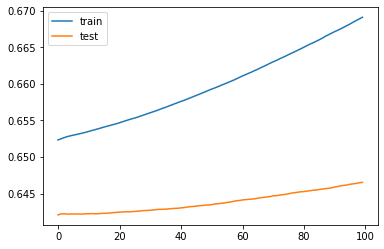

In [69]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.plot(scores[:, 0], label='train')
plt.plot(scores[:, 1], label='test')
plt.legend()

test score is still climbing.. keep going.. 

### Loss

> WARP: Weighted Approximate-Rank Pairwise loss. Maximises
  the rank of positive examples by repeatedly sampling negative
  examples until rank violating one is found. Useful when only
  positive interactions are present and optimising the top of
  the recommendation list (precision@k) is desired.

In [70]:
model = LightFM(loss='warp')

scores = []
for e in range(100):
    model.fit_partial(train, epochs=1)
    auc_train = auc_score(model, train).mean()
    auc_test = auc_score(model, test).mean()
    scores.append((auc_train, auc_test))
    
scores = np.array(scores)

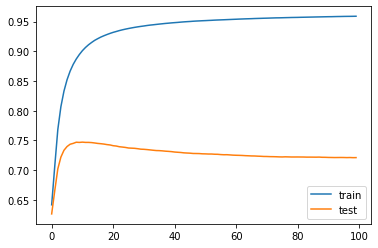

In [71]:
from matplotlib import pyplot as plt

plt.plot(scores[:, 0], label='train')
plt.plot(scores[:, 1], label='test')
plt.legend()

### Activity

Take 5 minutes to explore different epoch and loss combinations

### Early Stopping

In [72]:
from copy import deepcopy

model = LightFM(loss='warp')

count = 0
best = 0
scores = []
for e in range(100):
    if count > 5: # patience
        break
    model.fit_partial(train, epochs=1)
    auc_train = auc_score(model, train).mean()
    auc_test = auc_score(model, test).mean()
    print(f'Epoch: {e}, Train AUC={auc_train:.3f}, Test AUC={auc_test:.3f}')
    scores.append((auc_train, auc_test))
    if auc_test > best:
        best_model = deepcopy(model)
        best = auc_test
    else:
        count += 1

model = deepcopy(best_model)

Epoch: 0, Train AUC=0.643, Test AUC=0.631
Epoch: 1, Train AUC=0.714, Test AUC=0.673
Epoch: 2, Train AUC=0.779, Test AUC=0.714
Epoch: 3, Train AUC=0.819, Test AUC=0.735
Epoch: 4, Train AUC=0.844, Test AUC=0.744
Epoch: 5, Train AUC=0.863, Test AUC=0.750
Epoch: 6, Train AUC=0.876, Test AUC=0.753
Epoch: 7, Train AUC=0.886, Test AUC=0.755
Epoch: 8, Train AUC=0.895, Test AUC=0.756
Epoch: 9, Train AUC=0.901, Test AUC=0.756
Epoch: 10, Train AUC=0.907, Test AUC=0.757
Epoch: 11, Train AUC=0.912, Test AUC=0.756
Epoch: 12, Train AUC=0.916, Test AUC=0.755
Epoch: 13, Train AUC=0.919, Test AUC=0.754
Epoch: 14, Train AUC=0.922, Test AUC=0.754
Epoch: 15, Train AUC=0.925, Test AUC=0.754


In [74]:
#model.predict()

### New Predictions

In [73]:
user = 'aaron67'
df[df['user'] == user]

,item,user,review
13806,Mike and Ike Sour Licious Zours,aaron67,4
14073,Kit Kat Minis Crisp Wafers in Milk Chocolate,aaron67,5
14396,Reese's Peanut Butter Cup Pumpkins Milk Chocolate,aaron67,5
15153,Snickers Crisper Chocolate Bar,aaron67,1
15296,Snickers Peanut Butter Squared Bars,aaron67,5
16867,Reese's Peanut Butter Heart,aaron67,5


In [77]:
#user interaction machine object and store the user id object
im.user_encoder.transform([user])[0]

0

In [78]:
user_id = im.user_encoder.transform([user])[0]

In [79]:
# list(range(im.n_items)) = all items 

In [80]:
preds = model.predict(user_id, list(range(im.n_items)))
preds = pd.DataFrame(zip(preds, im.item_encoder.classes_), columns=['pred', 'item'])
preds = preds.sort_values('pred', ascending=False)
preds.head()

,pred,item
6,0.671620,Almond Joy Snack Size Bites
0,0.353970,3 Musketeers Candy Bar
80,0.196744,Mounds Candy Bar
139,0.071047,Warheads Extreme Sour Hard Candy
12,0.007101,Butterfinger Candy Bar


In [82]:
#Remove overlap
tried = df[df['user'] == user]['item'].values
list(preds[~preds['item'].isin(tried)]['item'].values[:5])

['Almond Joy Snack Size Bites',
 '3 Musketeers Candy Bar',
 'Mounds Candy Bar',
 'Warheads Extreme Sour Hard Candy',
 'Butterfinger Candy Bar']

### New Users

![](images/willy.jpg)

### Unless...

In [86]:
ex = pd.DataFrame([
    [0, 1, 1, 0, 0, 0], 
    [0, 1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 1]
])
ex

,0,1,2,3,4,5
0,0,1,1,0,0,0
1,0,1,1,1,0,0
2,1,0,0,1,0,0
3,0,1,1,0,0,1
4,0,0,0,1,1,1


In [87]:
# distance measure.. using K-nn.. to check if user are closer to each other..! 

In [88]:
# how to predict when a new user comes! ? ?

In [89]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(ex)

array([[0.        , 1.        , 2.        , 1.        , 2.23606798],
       [1.        , 0.        , 1.73205081, 1.41421356, 2.        ],
       [2.        , 1.73205081, 0.        , 2.23606798, 1.73205081],
       [1.        , 1.41421356, 2.23606798, 0.        , 2.        ],
       [2.23606798, 2.        , 1.73205081, 2.        , 0.        ]])

In [90]:
df = pd.read_csv("data/candy.csv")
df = df[df['review'] >= 4]

In [91]:
df.sample(5)

,item,user,review
11225,M&Ms Minis,arnoldgerald,5
17182,Heath Milk Chocolate English Toffee Bar,craigchristopher,5
7778,Snickers Chocolate Bar,kenneththomas,4
4405,Twizzlers Pull-N-Peel Candy Cherry,michelle07,4
11871,Swedish Fish Red Candy,muellerkristy,5


In [92]:
df = df.groupby(["user"])["item"].apply(lambda x: ",".join(x))
df = pd.DataFrame(df)
df.head()

,item
user,
aaron67,"Mike and Ike Sour Licious Zours,Kit Kat Minis ..."
aaron68,"Hubba Bubba Bubbletape Awesome Original,Brooks..."
aaron73,Dove Chocolate Promises Silky Smooth Sea Salt ...
abarker,"Reese's Peanut Butter Bunny,Ghirardelli Gourme..."
abigail04,"Kit Kat Minis Crisp Wafers in Milk Chocolate,P..."


In [101]:
#items that aaron likes
df.loc['aaron67'].values

array(["Mike and Ike Sour Licious Zours,Kit Kat Minis Crisp Wafers in Milk Chocolate,Reese's Peanut Butter Cup Pumpkins Milk Chocolate,Snickers Peanut Butter Squared Bars,Reese's Peanut Butter Heart"],
      dtype=object)

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=lambda x: x.split(","), max_features=250)
X = cv.fit_transform(df['item'])

In [103]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5)
nn.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [104]:
neighbors = nn.kneighbors(X, return_distance=False)
neighbors

array([[   0, 2042,  920,  186, 1625],
       [   1,  404, 2424, 1110, 2370],
       [   2, 2221,  677, 1386,  739],
       ...,
       [2525,  620,  782,  661, 1546],
       [2526,  308, 2236,  177,  801],
       [2527, 1252, 1350, 2111, 2346]], dtype=int64)

In [105]:
neighbors[0]

array([   0, 2042,  920,  186, 1625], dtype=int64)

In [108]:
candy = []
for n in neighbors[0]:
    c = df.iloc[int(n)].values[0].split(",")
    candy.extend(c)
    
list(set(candy))

#

['Airheads Bites Fruit',
 'Mounds Candy Bar',
 'Kraft Vanilla Caramels Snack Bags',
 'Sour Punch Real Rainbow Straws',
 'Nestle Butterfinger Bites',
 'Jet Puffed Stackermallows Marshmallows',
 "Reese's Peanut Butter Heart",
 'Kit Kat Minis Crisp Wafers in Milk Chocolate',
 'Snickers Peanut Butter Squared Bars',
 'Kirkland Milk Chocolate Almonds',
 "Hershey's Natural Unsweetened Cocoa",
 "Reese's Peanut Butter Cup Pumpkins Milk Chocolate",
 'Mike and Ike Sour Licious Zours']

### Putting a bow on it

In [109]:
df = pd.read_csv("data/candy.csv")
df = df[df['review'] >= 4]
df = df.groupby(["user"])["item"].apply(lambda x: ",".join(x))
df = pd.DataFrame(df)
df.head()

,item
user,
aaron67,"Mike and Ike Sour Licious Zours,Kit Kat Minis ..."
aaron68,"Hubba Bubba Bubbletape Awesome Original,Brooks..."
aaron73,Dove Chocolate Promises Silky Smooth Sea Salt ...
abarker,"Reese's Peanut Butter Bunny,Ghirardelli Gourme..."
abigail04,"Kit Kat Minis Crisp Wafers in Milk Chocolate,P..."


In [110]:
class NNRecommender:
    def __init__(
        self, n_neighbors=5, max_features=250, tokenizer=lambda x: x.split(",")):
        self.cv = CountVectorizer(tokenizer=tokenizer, max_features=max_features)
        self.nn = NearestNeighbors(n_neighbors=n_neighbors)

    def fit(self, X):
        self.X = X
        X = self.cv.fit_transform(X)
        self.nn.fit(X)
        return self

    def predict(self, X):
        Xp = []
        for Xi in X:
            Xt = self.cv.transform([Xi])
            neighbors = self.nn.kneighbors(Xt, return_distance=False)
            repos = []
            for n in neighbors[0]:
                r = self.X.iloc[int(n)].split(",")
                repos.extend(r)
            repos = list(set(repos))
            repos = [r for r in repos if r not in Xi.split(",")]
            Xp.append(repos)
        return Xp

In [111]:
n_neighbors = 5
max_features = 250
model = NNRecommender(n_neighbors, max_features)
model.fit(df["item"])

In [112]:
df.sample(1)['item'].values

array(["Skittles Wild Berry Candy,Starburst Tropical Fruit Chews Candy,Swedish Fish Soft Chewy Candy Original,Haribo Sour Gold Bears Gummi Candy,Sour Patch Watermelon,Reese's White Peanut Butter Cups"],
      dtype=object)

In [114]:
#model.predict(['Skittles Wild Berry Candy,Starburst Tropical Fruit Chews Candy,Swedish Fish Soft Chewy Candy Original,Haribo Sour Gold Bears Gummi Candy,Sour Patch Watermelon,Reese's White Peanut Butter Cups'])

In [115]:
sweet = ["Airheads Xtremes Sweetly Sour Candy Rainbow Berry,Life Savers Five Flavor Gummies,Twizzlers Pull-N-Peel Candy Cherry"]

In [116]:
peanut = ["Reese's Peanut Butter Cups Miniatures,M&Ms Peanut Chocolate Candy,Reese's Peanut Butter Big Cup"]

In [117]:
im.item_encoder.classes_

array(['3 Musketeers Candy Bar', '3 Musketeers Miniature Bars', '5 Gum',
       'Airheads Bites Fruit', 'Airheads White Mystery',
       'Airheads Xtremes Sweetly Sour Candy Rainbow Berry',
       'Almond Joy Snack Size Bites',
       'Altoids Curiously Strong Cinnamon Mints',
       'Bouquet of Fruits Valentine Chocolate Dipped Strawberries',
       'Brachs Candy Corn',
       'Brookside Dark Chocolate Acai Blueberry Flavors',
       'Brookside Dark Chocolate Pomegranate Flavor',
       'Butterfinger Candy Bar', 'Butterfinger Minis',
       'Butterfinger Peanut Butter Cups',
       'Butterfinger Peanut Butter Cups Minis',
       'Creme Savers Strawberries Rolls', 'Demets Turtles Original',
       'Dove Chocolate Promises Silky Smooth Almond Dark Chocolate',
       'Dove Chocolate Promises Silky Smooth Milk Chocolate',
       'Dove Chocolate Promises Silky Smooth Sea Salt Caramel Dark Chocolate',
       'Dove Chocolate Silky Smooth Dark Chocolate Large Bar',
       'Dove Chocolate Silk

In [118]:
model.predict(sweet)

[['Starburst Original',
  'Mars Candy Fun Size Mix Peanut And Peanut Butter Lovers',
  'Starburst Original Jelly Beans',
  'Trolli Sour Brite Eggs Candy',
  'Warheads Extreme Sour Hard Candy',
  'Demets Turtles Original',
  'Brookside Dark Chocolate Pomegranate Flavor']]

In [119]:
model.predict(peanut)

[['Twix',
  "Hershey's Cookies 'n' Creme Candy Bar",
  'Snickers Chocolate Bar',
  '3 Musketeers Candy Bar',
  "Reese's Peanut Butter Egg",
  'Ferrero Rocher Chocolate',
  "Reese's Outrageous King Size Bar"]]

![](images/the_end.jpg)

### Links

**Max Humber** 

- [Twitter](https://twitter.com/maxhumber)
- [LinkedIn](https://www.linkedin.com/in/maxhumber/)
- [GitHub](https://github.com/maxhumber)

**Open Source**

- [marc](https://github.com/maxhumber/marc) - (**mar**kov **c**hain) is a small, but flexible Markov chain generator.
- [gazpacho](https://github.com/maxhumber/gazpacho) - is a web scraping library. You should use it!
- [mummify](https://github.com/maxhumber/mummify) - makes model prototyping faster. 
- [chart](https://github.com/maxhumber/chart) - a zero-dependency python package that prints basic charts to a Jupyter output

- [recommend](https://github.com/maxhumber/recommend) - basically this presentation (super beta right now)

#### Upcoming

![](images/mvml.png)

[MVML Page](https://learning.oreilly.com/live-training/courses/minimum-viable-machine-learning/0636920331612/)


![](images/de4ds.png)

[DE4DS Page](https://learning.oreilly.com/live-training/courses/data-engineering-for-data-scientists/0636920334545/)

### Appendix

For when your data looks like this...

In [ ]:
df = pd.read_csv('data/candy.csv')
df = df[df['user'].isin(df['user'].sample(10))]
df = df.pivot(index='item', columns='user', values='review')
df = df.reset_index()
df.head(5)

Do this...

In [ ]:
df = df.melt(id_vars='item', var_name='user', value_name='review')
df = df.dropna().reset_index(drop=True)

df.head(5)

### Parting Thoughts

![](images/savage.png)

[Source](https://news.ycombinator.com/item?id=20495047)